**TASK 1:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import os
import zipfile


In [ ]:
%matplotlib inline

In [ ]:
zip_file_path = "weather.zip"  # Ensure the file is in your working directory
extract_folder = "weather"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)  # Extract into "weather" folder


In [ ]:
!cd weather/weather

In [ ]:
!ls weather/weather

project2.ipynb	RSM00030710.dly  USW00014922.dly  USW00023188.dly
readme.txt	stations.txt	 USW00022536.dly  weather.README


**TASK 2**

Task 2-a:

In [ ]:
 open("stations.txt", "r").readlines()[:10]


['ACW00011604  17.1167  -61.7833   10.1    ST JOHNS COOLIDGE FLD                       \n',
 'ACW00011647  17.1333  -61.7833   19.2    ST JOHNS                                    \n',
 'AE000041196  25.3330   55.5170   34.0    SHARJAH INTER. AIRP            GSN     41196\n',
 'AEM00041194  25.2550   55.3640   10.4    DUBAI INTL                             41194\n',
 'AEM00041217  24.4330   54.6510   26.8    ABU DHABI INTL                         41217\n',
 'AEM00041218  24.2620   55.6090  264.9    AL AIN INTL                            41218\n',
 'AF000040930  35.3170   69.0170 3366.0    NORTH-SALANG                   GSN     40930\n',
 'AFM00040938  34.2100   62.2280  977.2    HERAT                                  40938\n',
 'AFM00040948  34.5660   69.2120 1791.3    KABUL INTL                             40948\n',
 'AFM00040990  31.5000   65.8500 1010.0    KANDAHAR AIRPORT                       40990\n']

In [ ]:
def parsefile(filename):
    return np.genfromtxt(filename,
                         delimiter = dly_delimiter,
                         usecols = dly_usecols,
                         dtype = dly_dtype,
                         names = dly_names)

dly_delimiter = [11,4,2,4] + [5,1,1,1] * 31
dly_usecols = [1,2,3] + [4*i for i in range(1,32)]
dly_dtype = [np.int32,np.int32,(np.str_,4)] + [np.int32] * 31
dly_names = ['year','month','obs'] + [str(day) for day in range(1,31+1)]

minneapolis = parsefile('/content/weather/weather/USW00014922.dly')
minneapolis[0]

(1938, 4, 'TMAX', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, 106, 189, 172, 217, 256, 194, 117, 133, 228, 217, 172, 144, 89, 144, 94, 111, 156, 267, 256, 156, 144, 222, -9999)

In [ ]:
def unroll(record):
    startdate = np.datetime64('{}-{:02}'.format(record['year'],record['month']))
    dates = np.arange(startdate,startdate + np.timedelta64(1,'M'),np.timedelta64(1,'D'))

    rows = [(date,record[str(i+1)]/10) for i,date in enumerate(dates)]

    return np.array(rows,dtype=[('date','M8[D]'),('value','d')])

unroll(minneapolis[0])

array([('1938-04-01', -999.9), ('1938-04-02', -999.9),
       ('1938-04-03', -999.9), ('1938-04-04', -999.9),
       ('1938-04-05', -999.9), ('1938-04-06', -999.9),
       ('1938-04-07', -999.9), ('1938-04-08', -999.9),
       ('1938-04-09',   10.6), ('1938-04-10',   18.9),
       ('1938-04-11',   17.2), ('1938-04-12',   21.7),
       ('1938-04-13',   25.6), ('1938-04-14',   19.4),
       ('1938-04-15',   11.7), ('1938-04-16',   13.3),
       ('1938-04-17',   22.8), ('1938-04-18',   21.7),
       ('1938-04-19',   17.2), ('1938-04-20',   14.4),
       ('1938-04-21',    8.9), ('1938-04-22',   14.4),
       ('1938-04-23',    9.4), ('1938-04-24',   11.1),
       ('1938-04-25',   15.6), ('1938-04-26',   26.7),
       ('1938-04-27',   25.6), ('1938-04-28',   15.6),
       ('1938-04-29',   14.4), ('1938-04-30',   22.2)],
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [ ]:
def getobs(filename,obs):
    data = np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])

    data['value'][data['value'] == -999.9] = np.nan

    return data

minneapolis_tmax = getobs('/content/weather/weather/USW00014922.dly','TMAX')
minneapolis_tmax[0]


('1938-04-01', nan)

In [ ]:
def fillnans(data):
    dates_float = data['date'].astype(np.float64)
    nan = np.isnan(data['value'])
    data['value'][nan] = np.interp(dates_float[nan],dates_float[~nan],data['value'][~nan])

fillnans(minneapolis_tmax)
np.mean(minneapolis_tmax['value'])

12.74308121666019

In [ ]:
def selectyear(data,year):
    start = np.datetime64('{}'.format(year))
    end = start + np.timedelta64(1,'Y')

    return data[(data['date'] >= start) & (data['date'] < end)]['value']

#selectyear(minneapolis_tmax,1950)

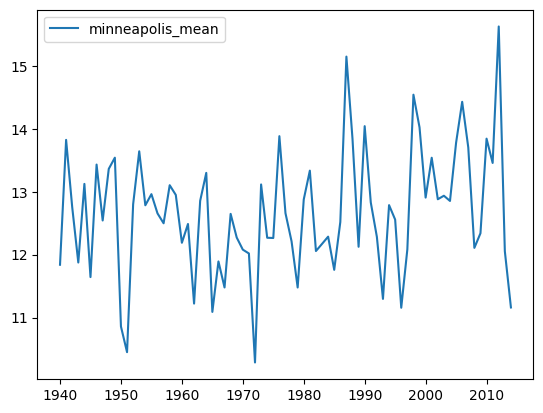

In [ ]:
def avg_tempoveryear(data, start, stop):
    years = np.arange(start,stop + 1)
    all_data = np.vstack([selectyear(data, year)[:365] for year in years])
    avg = np.mean(all_data, axis=1)
    return years, avg

years, minneapolis_mean = avg_tempoveryear(minneapolis_tmax, 1940,2014)
plt.plot(years, minneapolis_mean, label='minneapolis_mean')
plt.legend()
plt.show()

In [ ]:
minneapolis_mean

array([11.83917808, 13.82547945, 12.75561644, 11.87452055, 13.12520548,
       11.6430137 , 13.43260274, 12.54328767, 13.36410959, 13.54219178,
       10.8569863 , 10.44876712, 12.80109589, 13.64356164, 12.78493151,
       12.96191781, 12.65589041, 12.49863014, 13.10438356, 12.94986301,
       12.18849315, 12.48767123, 11.22136986, 12.85616438, 13.30027397,
       11.0890411 , 11.89205479, 11.47780822, 12.64821918, 12.27178082,
       12.07945205, 12.01835616, 10.28465753, 13.11643836, 12.26849315,
       12.26465753, 13.88438356, 12.65945205, 12.21123288, 11.47726027,
       12.87780822, 13.33589041, 12.05726027, 12.1709589 , 12.2860274 ,
       11.75835616, 12.51917808, 15.14986301, 13.84164384, 12.12493151,
       14.04356164, 12.83013699, 12.28273973, 11.29589041, 12.78767123,
       12.55753425, 11.15534247, 12.08328767, 14.54383562, 14.02438356,
       12.90739726, 13.54109589, 12.88109589, 12.93671233, 12.8539726 ,
       13.77972603, 14.43068493, 13.70465753, 12.10739726, 12.33

TASK2-b:

In [ ]:
minneapolis_highest_mean_year = years[np.argmax(minneapolis_mean)]
print('minneapolis_highest_mean_year: ', minneapolis_highest_mean_year)

minneapolis_highest_mean_year:  2012


TASK2-c:

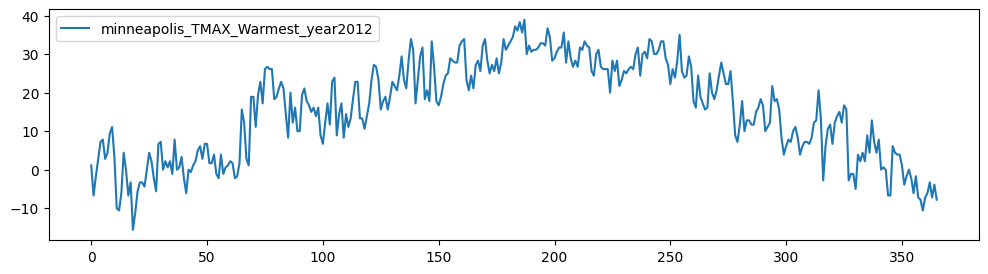

In [ ]:
temp_highest_mean_year = selectyear(minneapolis_tmax, minneapolis_highest_mean_year)
plt.figure(figsize=(12, 3))
plt.plot(temp_highest_mean_year,label = "minneapolis_TMAX_Warmest_year2012" )
plt.legend()
plt.show()

**TASK3**

Task3-a:

In [ ]:
San_Diego = parsefile('/content/weather/weather/USW00023188.dly')
San_Diego_tmin = getobs('/content/weather/weather/USW00023188.dly','TMIN')
fillnans(San_Diego_tmin)

In [ ]:
years, San_Diego_mean = avg_tempoveryear(San_Diego_tmin, 1940, 2014)
San_Diego_mean

array([13.36575342, 13.33753425, 12.46356164, 12.86931507, 12.05726027,
       12.68109589, 12.81534247, 12.64493151, 11.66082192, 12.16657534,
       12.72684932, 12.90739726, 12.76410959, 12.87671233, 13.33068493,
       12.90712329, 13.02246575, 14.01452055, 14.33506849, 14.75068493,
       13.25671233, 13.30767123, 12.72273973, 13.15342466, 12.54630137,
       12.93726027, 13.53287671, 13.4709589 , 13.96246575, 14.03945205,
       14.17616438, 13.37232877, 13.92493151, 13.83589041, 13.95452055,
       13.20986301, 15.01342466, 15.11479452, 15.6539726 , 15.02931507,
       15.29945205, 16.17452055, 14.92410959, 16.23315068, 16.39178082,
       14.59561644, 14.14      , 13.8109589 , 13.87808219, 13.80273973,
       13.98465753, 13.5169863 , 14.8830137 , 14.23671233, 13.69643836,
       14.31835616, 14.83890411, 15.1230137 , 14.13123288, 13.40273973,
       14.43808219, 13.93890411, 13.73917808, 14.53835616, 15.09013699,
       14.73643836, 14.76273973, 13.99506849, 14.16246575, 14.42

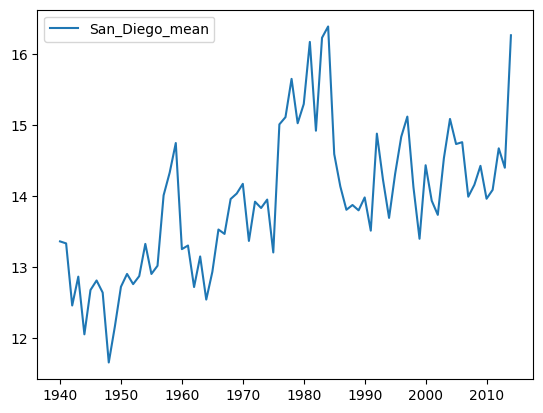

In [ ]:
plt.plot(years, San_Diego_mean, label='San_Diego_mean')
plt.legend()
plt.show()


**TASK3-b:**

In [ ]:
San_Diego_lowest_mean_year = years[np.argmin(San_Diego_mean)]
print('San_Diego_lowest_mean_year: ', San_Diego_lowest_mean_year)

San_Diego_lowest_mean_year:  1948


Task3-c:

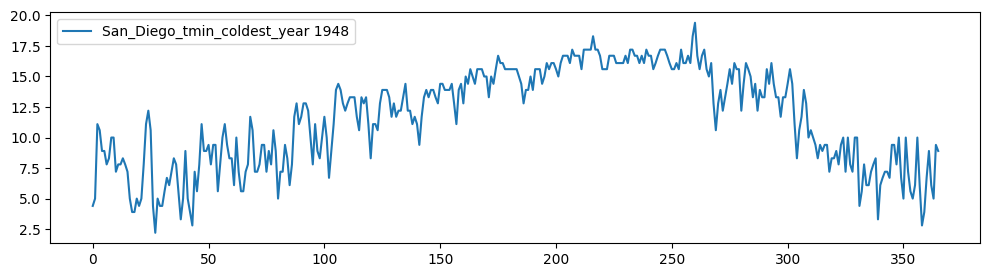

In [ ]:
temp_lowest_mean_year = selectyear(San_Diego_tmin, San_Diego_lowest_mean_year)
plt.figure(figsize=(12, 3))
plt.plot(temp_lowest_mean_year,label = "San_Diego_tmin_coldest_year 1948" )
plt.legend()
plt.show()

**TASK4**

In [ ]:
minneapolis_tmax = getobs('/content/weather/weather/USW00014922.dly','TMAX')
fillnans(minneapolis_tmax)
minneapolis_tmax_2012 = selectyear(minneapolis_tmax, 2012)

minneapolis_tmin = getobs('/content/weather/weather/USW00014922.dly','TMIN')
fillnans(minneapolis_tmin)
minneapolis_tmin_2012 = selectyear(minneapolis_tmin, 2012)

San_Diego_tmax = getobs('/content/weather/weather/USW00023188.dly','TMAX')
fillnans(San_Diego_tmax)
San_Diego_tmax_1948 = selectyear(San_Diego_tmax, 1948)

San_Diego_tmin = getobs('/content/weather/weather/USW00023188.dly','TMIN')
fillnans(San_Diego_tmin)
San_Diego_tmin_1948 = selectyear(San_Diego_tmin, 1948)

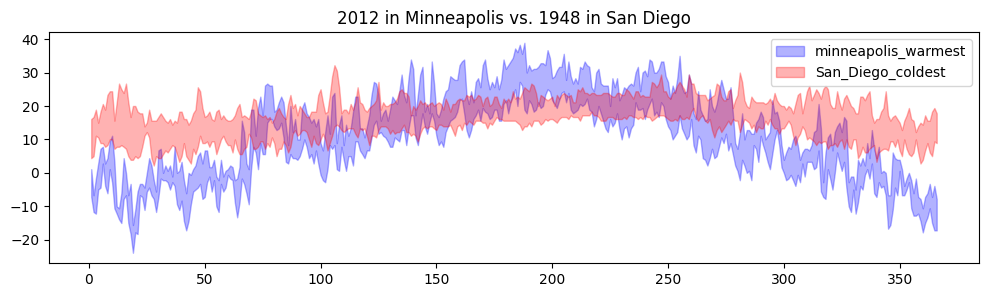

In [ ]:
x = np.arange(1, len(minneapolis_tmax_2012)+1)
plt.figure(figsize=(12, 3))
plt.fill_between(x, minneapolis_tmax_2012, minneapolis_tmin_2012, color='blue', alpha=0.3, label='minneapolis_warmest')
plt.fill_between(x, San_Diego_tmax_1948, San_Diego_tmin_1948, color='red', alpha=0.3, label='San_Diego_coldest')
plt.legend()
plt.title("2012 in Minneapolis vs. 1948 in San Diego")
plt.show()